In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nnfs.models import BaseModel
from nnfs.layers import LinearLayer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The classic example used for basic machine learning models is the MNIST dataset, which contains about 60,000 training examples of handwritten digits, with the goal of classifying the digit from the image. For this example, we will consider the vectorized form, that is, treating the 28x28 images as vectors of length 784 instead. As such, no convolutions will be required. 
The example model is a two layer model, using 800 nodes in the first layer and 10 nodes in the second. 

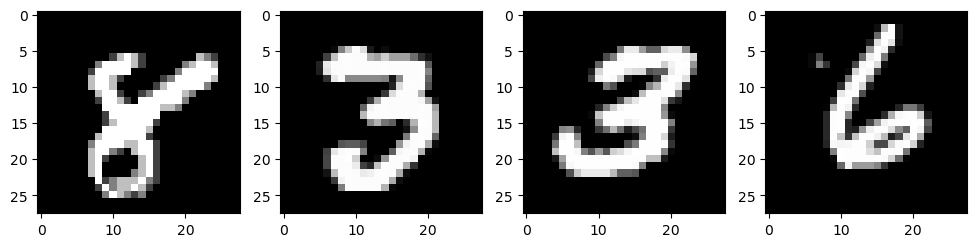

[8 3 3 6]


In [ ]:
# Load datasets into numpy arrays
with open("data/train-images.idx3-ubyte", "rb") as file:
    train_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28 * 28)
with open("data/t10k-images.idx3-ubyte", "rb") as file:
    test_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28 * 28)

with open("data/train-labels.idx1-ubyte", "rb") as file:
    train_labels = np.frombuffer(file.read(), np.uint8, offset=8)
with open("data/t10k-labels.idx1-ubyte", "rb") as file:
    test_labels = np.frombuffer(file.read(), np.uint8, offset=8)


def draw_mnist_num(arr):
    """Helper function to draw MNIST numbers"""
    # Number of graphs
    nums = arr.shape[0]

    # Loop and graph
    fig, axes = plt.subplots(1, nums)
    for i in range(nums):
        axes[i].imshow(arr[i].reshape(28, 28), cmap="gray")
    fig.set_size_inches(3 * nums, 3)
    plt.show()

# Confirm images and labels are aligned
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_mnist_num(train_image[rand_inds])
print(train_labels[rand_inds])

# Adjust labels to correspond to class output
train_label_arr = np.zeros((train_labels.shape[0], 10), dtype=int)
train_label_arr[train_labels - 1] = 1
test_label_arr = np.zeros((test_labels.shape[0], 10), dtype=int)
test_label_arr[test_labels - 1] = 1

# Convert from (0, 255) to (0, 1) range
train_image = train_image.copy() / 256
test_image = test_image.copy() / 256

In [3]:
# Set up model with two layers
layers = [
    LinearLayer((784), (800)),
    LinearLayer((800), (10))
]

# Train model
model = BaseModel(layers, lambda x: x)
model.train([train_image, train_label_arr], [test_image, test_label_arr], batch_size = 64, epochs = 5)

Start of Epoch 1:


100%|██████████| 937/937 [02:29<00:00,  6.28it/s]


Average loss at epoch 1: 0.00000
Start of Epoch 2:


100%|██████████| 937/937 [02:31<00:00,  6.18it/s]


Average loss at epoch 2: 0.00000
Start of Epoch 3:


100%|██████████| 937/937 [02:30<00:00,  6.21it/s]


Average loss at epoch 3: 0.00000
Start of Epoch 4:


100%|██████████| 937/937 [02:29<00:00,  6.28it/s]


Average loss at epoch 4: 0.00000
Start of Epoch 5:


100%|██████████| 937/937 [02:32<00:00,  6.16it/s]


Average loss at epoch 5: 0.00000


ValueError: Unknown format code 'i' for object of type 'float'

In [ ]:
# Check if model can accurately label images
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_mnist_num(train_image[rand_inds])
print(np.argmax(model.forward(train_image[rand_inds]), axis=1))